# --------------------------------DIABETES PREDICTION-------------------------------------------

## INTRODUCTION:

As one of the most prevalent  diseases in the world, diabetes, affects the health of millions of people and also act as a trigger to several health conditions like heart disease, stroke ,loss of vision , kidney failure and much more.

This project focuses mainly on the exploratory data analysis(EDA) of Diabetes data taken from Kaggle, which consist of 253680 rows and 22 columns. Our primary aim is to find the relation between various features and to predict the occurrence of Diabetes with respect to these features.

The target variable in the dataset is Diabetes012 which consist of three categories 0-non diabetic,1-pre diabetic and 2- diabetic.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### To display all the columns of the dataframe

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
# read the csv file into a pandas data frame
df=pd.read_csv('diabetes.csv')

In [4]:
#check the first 5 rows of the dataframe
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
# check the shape of the dataframe
df.shape

(253680, 22)

In [6]:
# Check the presence of any null values
df.isna().any()

Diabetes_012            False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool

In [7]:
# Check the total of all null values in the columns
df.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [8]:
# to print all the column names
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

### CORRELATION -HEAT MAP

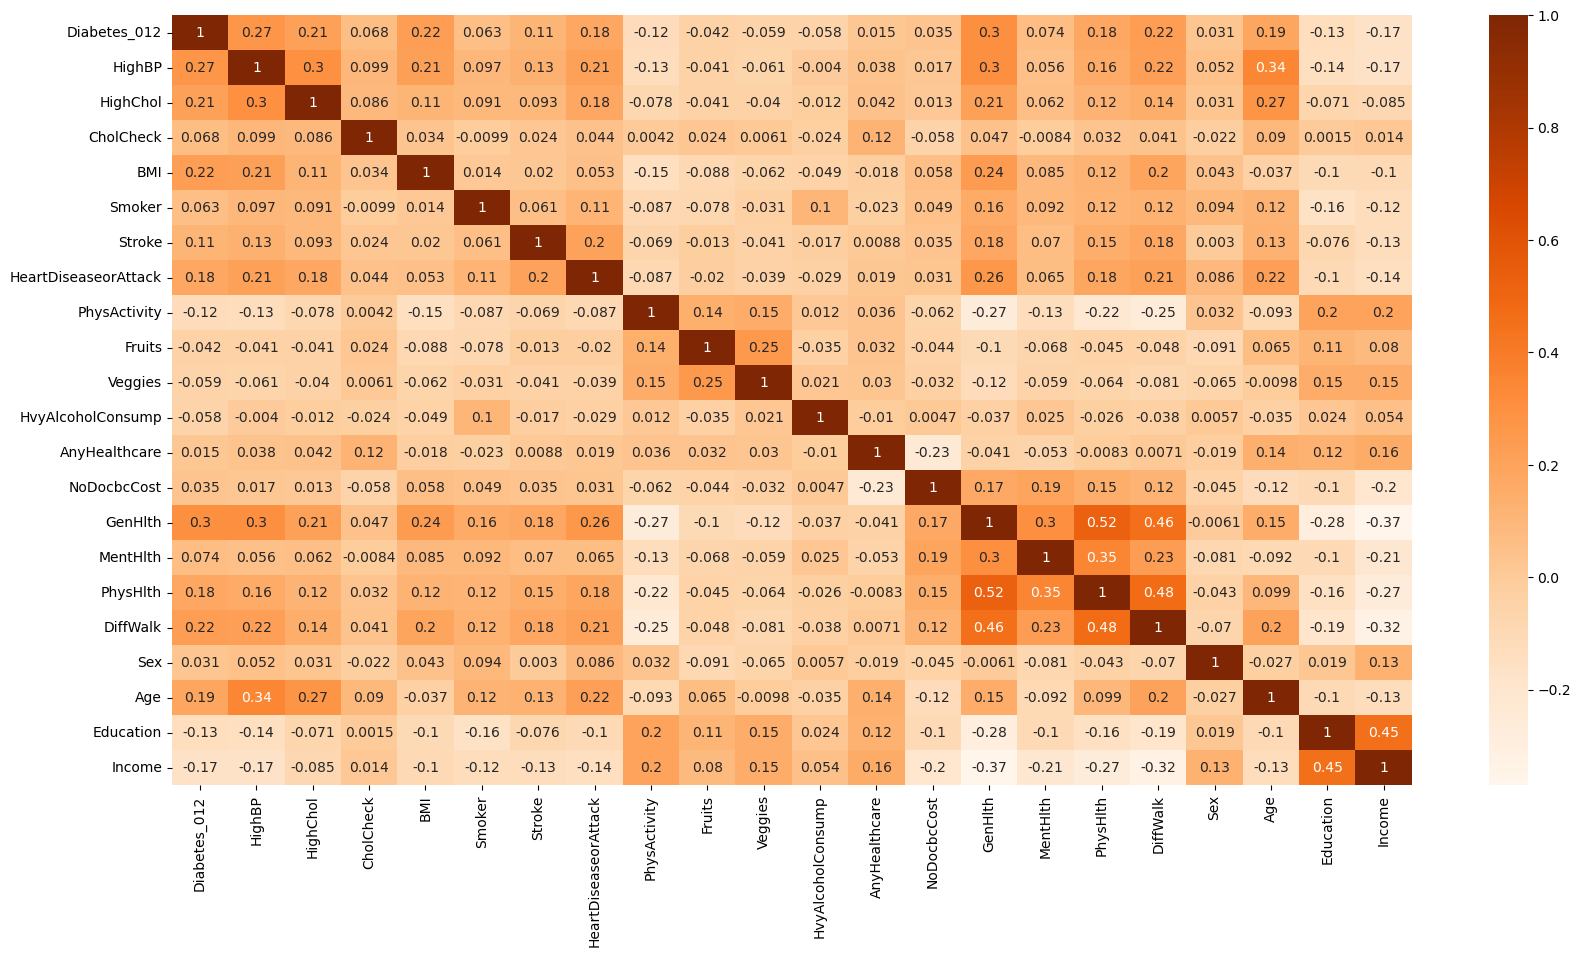

In [9]:
# to see the correlation between all the variables in the dataset
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap="Oranges", annot=True)
plt.show()

###  The highest correlation observed is 0.52, feautures are not highly correlated.

# -------------------------------------------------------------------------------------------------------------

# EXPLORATORY DATA ANALYSIS

# Count of Diabetic, Pre-Diabetic and non Diabetic people

In [10]:
diabetic_count=df.Diabetes_012.value_counts()
diabetic_count

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64

# Plot of Diabetic,pre-Diabetic and no Diabetic(bar chart)


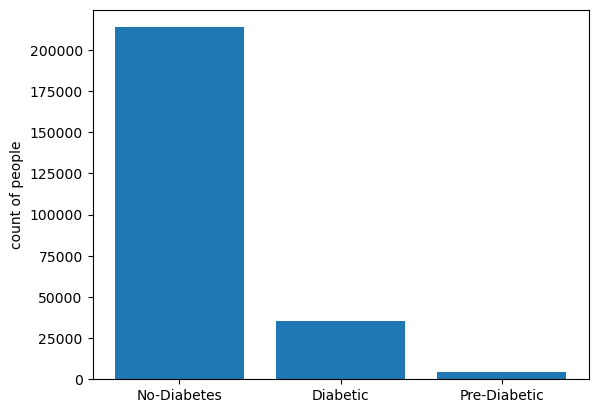

In [11]:
plt.ylabel('count of people')
plt.bar(['No-Diabetes','Diabetic','Pre-Diabetic'],diabetic_count)
plt.show()

In [12]:
len(df)

253680

In [13]:
target=df.Diabetes_012.value_counts()/len(df)

In [14]:
target

0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: Diabetes_012, dtype: float64

# PERCENTAGE OF DIABETIC PEOPLE IN THE WHOLE DATA
percentage of diabetic, prediabetic and non diabetic in the whole data?


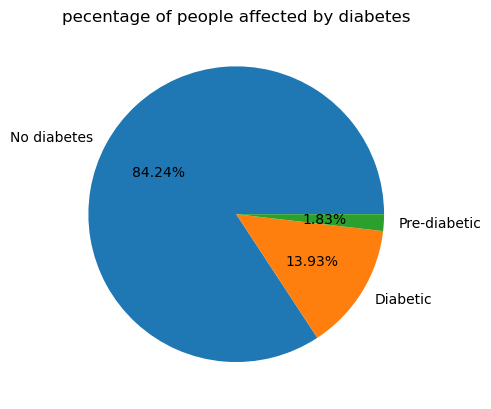

In [15]:
plt.pie(target,autopct='%1.2f%%',labels=['No diabetes','Diabetic','Pre-diabetic'])
plt.title('pecentage of people affected by diabetes')
plt.show()

With respect to total data ,the number of non diabetic people are more approximately=85%
Diabetic patients around 14%
pre-diabetic patients around 1.8% (very small considering the data)

# Total males and total females count?


In [16]:
df.Sex.value_counts()

0.0    141974
1.0    111706
Name: Sex, dtype: int64

In [17]:
total_male=111706
total_female=141974

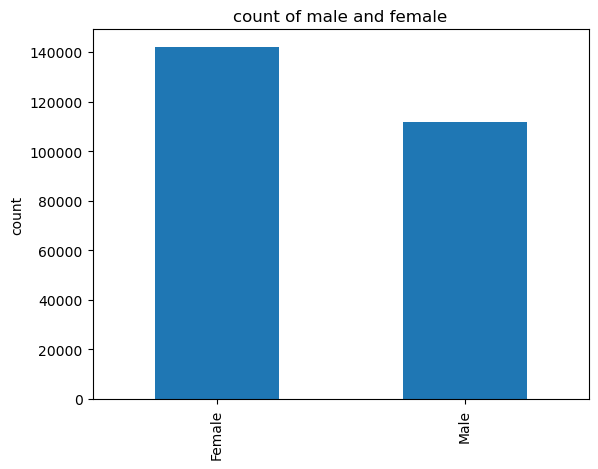

In [18]:
df.Sex.value_counts().plot(kind='bar')
plt.xticks([0.0,1.0],['Female','Male'])
plt.ylabel('count')

plt.title('count of male and female')
plt.show()

# Percentage of male and female in the dataset

In [19]:
percent_male_female=df.Sex.value_counts()/len(df)
percent_male_female

0.0    0.559658
1.0    0.440342
Name: Sex, dtype: float64

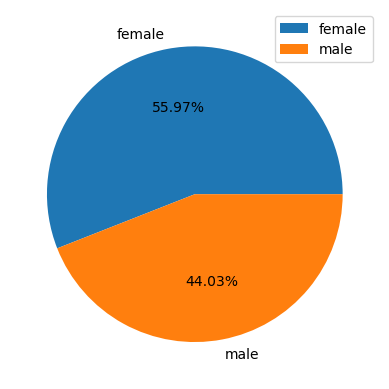

In [20]:
percent_male_female.plot.pie(autopct='%1.2f%%',legend=True,labels=['female','male'],ylabel='')
plt.show()

# Number of males and females who are Diabetic?

In [21]:
diabetic=df['Sex'][df['Diabetes_012']==2].value_counts()
diabetic

0.0    18411
1.0    16935
Name: Sex, dtype: int64

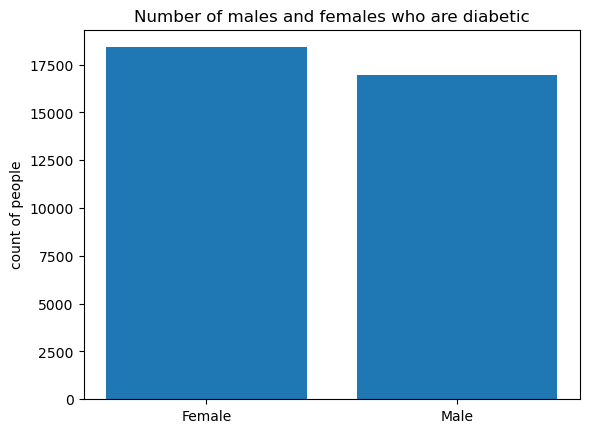

In [22]:
plt.bar(['Female','Male'],diabetic)
plt.ylabel('count of people')
plt.title('Number of males and females who are diabetic')
plt.show()

### count of diabetic Females are more than males in the dataset, but considering the size of the whole data set the percentage of males and females who are diabetic is to be investigated?


# Percentage of Diabetic males and Diabetic females

In [23]:
len(df[(df['Sex']==0)&(df['Diabetes_012']==2)])

18411

In [24]:
total_female

141974

In [25]:
percent_diab_females=len(df[(df['Sex']==0)&(df['Diabetes_012']==2)])/total_female
percent_diab_females

0.12967867355994758

In [26]:
percent_diab_males=len(df[(df['Sex']==1)&(df['Diabetes_012']==2)])/total_male

In [27]:
percent_diab_males

0.1516033158469554

Almost 13% of the females in the data are diabetic and 15% of the males are diabetic

That is for every 100 males---15 are diabetic
        for every 100 females--- 13 are diabetic
        
conclusion: Both male and female are equally likely to be affected by diabetis

# With respect to BMI find the percent of obese people




### If your BMI is 18.5 to 24.9, it falls within the normal or Healthy Weight range. If your BMI is 25.0 to 29.9, it falls within the overweight range. If your BMI is 30.0 or higher, it falls within the obese range.

In [28]:
# find the unique values in the BMI column
df['BMI'].unique()


array([40., 25., 28., 27., 24., 30., 34., 26., 33., 21., 23., 22., 38.,
       32., 37., 31., 29., 20., 35., 45., 39., 19., 47., 18., 36., 43.,
       55., 49., 42., 17., 16., 41., 44., 50., 59., 48., 52., 46., 54.,
       57., 53., 14., 15., 51., 58., 63., 61., 56., 74., 62., 64., 66.,
       73., 85., 60., 67., 65., 70., 82., 79., 92., 68., 72., 88., 96.,
       13., 81., 71., 75., 12., 77., 69., 76., 87., 89., 84., 95., 98.,
       91., 86., 83., 80., 90., 78.])

In [29]:
under_weight=len(df[df['BMI']<18.5])
under_weight

3127

In [30]:
healthy_weight=len(df[(df['BMI']>=18.5)&(df['BMI']<=24.9)])
healthy_weight

68953

In [31]:
over_weight=len(df[(df['BMI']>=25)&(df['BMI']<=29.9)])
over_weight

93749

In [32]:
obese=len(df[df['BMI']>=30])
obese

87851

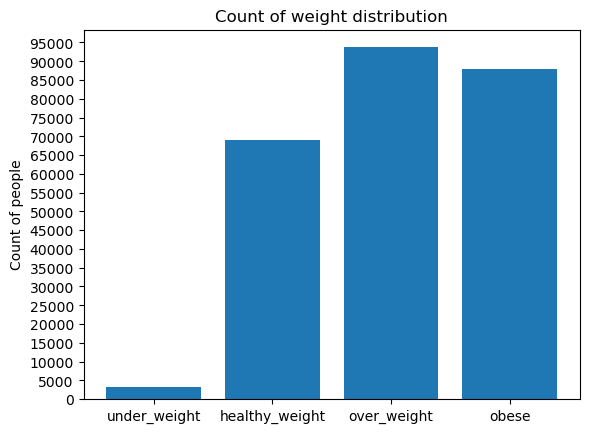

In [33]:
plt.bar(['under_weight','healthy_weight','over_weight','obese'],[under_weight,healthy_weight,over_weight,obese])
plt.title('Count of weight distribution')
max_value=100000
ticks_loc = np.arange(0, max_value, step=5000)
plt.yticks(ticks_loc)
plt.ylabel('Count of people')

plt.show()

### The count of overweight and obese population is very high as compared to the number of healthy individuals

# Percentage of the  weight of population

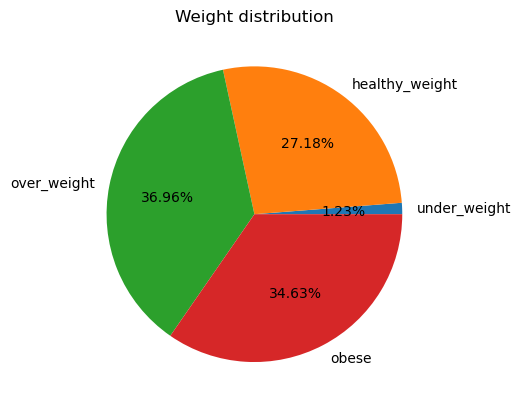

In [34]:
plt.pie([under_weight,healthy_weight,over_weight,obese],labels=['under_weight','healthy_weight','over_weight','obese'],autopct='%1.2f%%')
plt.title('Weight distribution')
plt.show()

conclusion: Approximately 73% of the population is unhealthy

overweight population=36.96%

obese population=34.63%

underweight population=1.23%


Healthy population is only about 27.18% 

# Which sex is more unhealthy(more underweight overweight and obese)?

In [35]:
unhealthy_population=df[~((df['BMI']>18.5)  & (df['BMI']<=24.9))] 
unhealthy_population.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0


In [36]:
#use negation on the number of healthy individuals to get the total unhealthy individuals--verified by adding the len of data
under_weight+over_weight+obese

184727

In [37]:
unhealthy_population.Sex.value_counts()

0.0    97027
1.0    87700
Name: Sex, dtype: int64



The number of unhealthy females is greater than the number of unhealthy males

unhealthy_ males=87700,  unhealthy_females=97027

In [38]:
unhealthy_females=len(unhealthy_population[unhealthy_population['Sex']==0])
unhealthy_males=len(unhealthy_population[unhealthy_population['Sex']==1])


unhealthy_females

97027

In [39]:
unhealthy_males

87700

# Bar graph of unhealthy male and female in terms of BMI

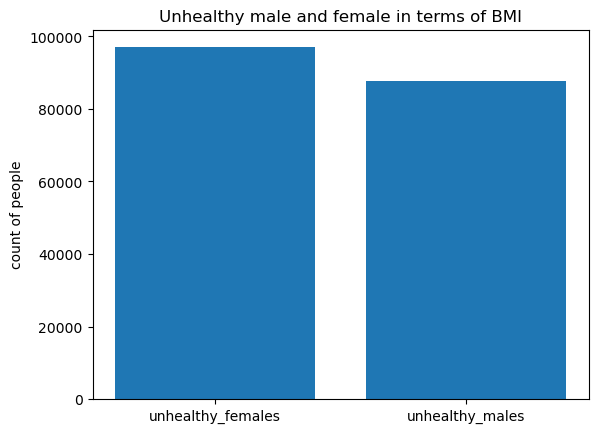

In [40]:
plt.bar(['unhealthy_females','unhealthy_males'],[unhealthy_females,unhealthy_males])
plt.ylabel('count of people')
plt.title('Unhealthy male and female in terms of BMI')
plt.show()

# Percentage of male and female that are unhealthy --in terms of BMI

In [41]:
percent_un_males=unhealthy_males/total_male
percent_un_males

0.7850965928419243

In [42]:
percent_un_females=unhealthy_females/total_female
percent_un_females

0.6834138645104033

# important conclusion:  78% of males  and 68%females are unhealthy (BMI)

Even though the count of unhealthy females is more than males, if we consider the percentage of unhealthy males and unhealthy females it is clear that Male are more unhealthy in terms of BMI than females.

for every 100 males---78 of them are in unhealthy BMI range

for every 100 females---only 68 of them are in unhealthy BMI range

# ------------------------------------------------------------------------------------------------------------

# No of male and female who are prediabetic(prone to diabetes)

In [43]:
pre_diabetic=df['Sex'][df['Diabetes_012']==1].value_counts()
pre_diabetic

0.0    2604
1.0    2027
Name: Sex, dtype: int64

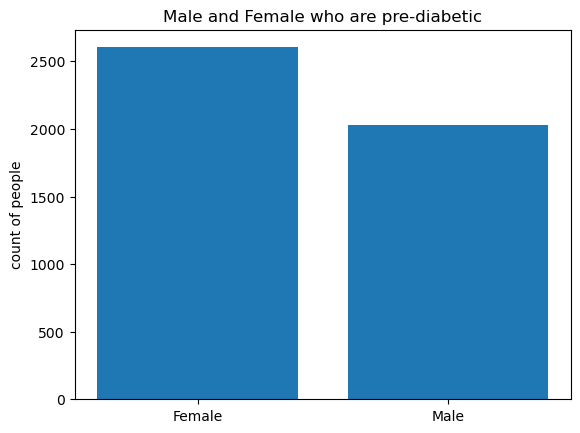

In [44]:
plt.bar(['Female','Male'],pre_diabetic)
plt.ylabel('count of people')
plt.title('Male and Female who are pre-diabetic')
plt.show()

In [45]:
percent_prediab_females=len(df[(df['Sex']==0)&(df['Diabetes_012']==1)])/total_female
percent_prediab_females

0.01834138645104033

In [46]:
percent_prediab_males=len(df[(df['Sex']==1)&(df['Diabetes_012']==1)])/total_male
percent_prediab_males

0.018145847134442197

## The percentage of pre-diabetic males and females are almost equal and very low around 1.8% of respective male and female population

# -------------------------------------------------------------------------------------------------------------

## note:  we have seen the chance of both genders being diabetic almost same. see the effects of lifestyle habits on overall health (connection to BMI, heart disease,stroke etc)

# BMI and Diabetes relation

In [47]:
healthy_population=df[(df['BMI']>18.5)  & (df['BMI']<=24.9)]
healthy_population.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0
16,0.0,1.0,1.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,10.0,4.0,3.0
17,2.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,5.0,6.0
18,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,15.0,0.0,0.0,0.0,2.0,6.0,7.0


In [48]:
healthy_population['Diabetes_012'].value_counts()

0.0    64336
2.0     3928
1.0      689
Name: Diabetes_012, dtype: int64

In [49]:
unhealthy_population['Diabetes_012'].value_counts()

0.0    149367
2.0     31418
1.0      3942
Name: Diabetes_012, dtype: int64

it is clear from the above that healthy BMI people are very less affected by pre-diabetic and diabetic conditions.

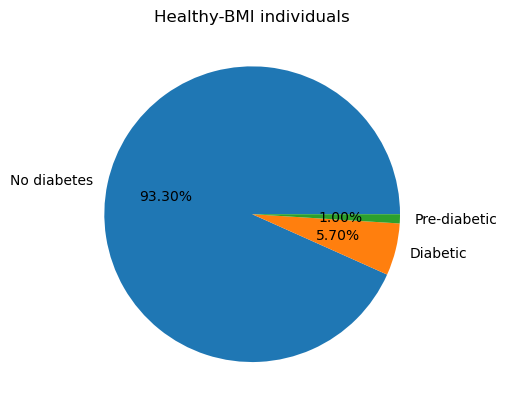

In [50]:
healthy_population['Diabetes_012'].value_counts().plot.pie(autopct='%1.2f%%',labels=['No diabetes','Diabetic','Pre-diabetic'],ylabel='')
plt.title('Healthy-BMI individuals')
plt.show()

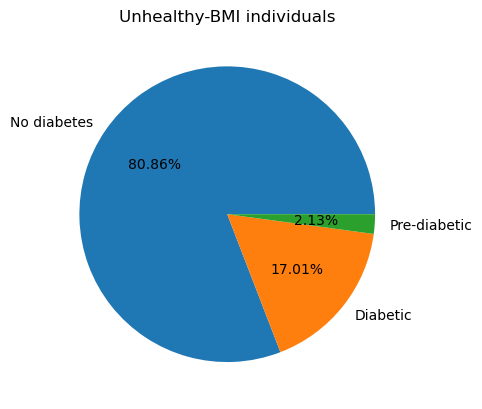

In [51]:
unhealthy_population['Diabetes_012'].value_counts().plot.pie(autopct='%1.2f%%',labels=['No diabetes','Diabetic','Pre-diabetic'],ylabel='')
plt.title('Unhealthy-BMI individuals')
plt.show()

## only 5.7% of the healthy BMI individuals affected by diabetes,whereas 17.01% of unhealthy BMI individuals are affected by diabetes.This shows that  overweight,underweight,obese conditions increases the risk of diabetes

# ----------------------------------------------------------------------------------------------------------

# Life style effects on health 

In [52]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

# Physical activity --->BMI connection

In [53]:
unhealthy_population['PhysActivity'].value_counts()

1.0    135185
0.0     49542
Name: PhysActivity, dtype: int64

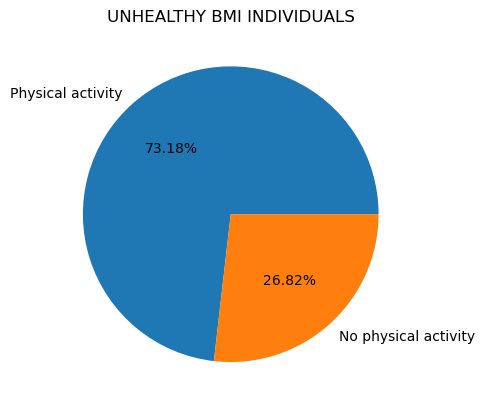

In [54]:
unhealthy_population['PhysActivity'].value_counts().plot.pie(autopct='%1.2f%%',labels=['Physical activity','No physical activity'],ylabel='')
plt.title('UNHEALTHY BMI INDIVIDUALS')
plt.show()

In [55]:
healthy_population['PhysActivity'].value_counts()

1.0    56735
0.0    12218
Name: PhysActivity, dtype: int64

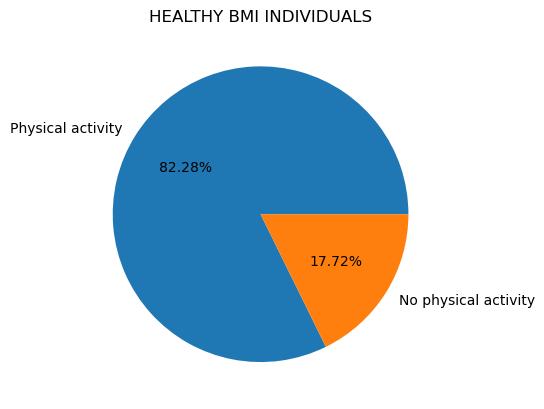

In [56]:
healthy_population['PhysActivity'].value_counts().plot.pie(autopct='%1.2f%%',labels=['Physical activity','No physical activity'],ylabel='')
plt.title('HEALTHY BMI INDIVIDUALS')
plt.show()

## It is clear that 82% of healthy BMI individuals do exercise regularly, whereas only 73% in the case of unhealthy BMI. This shows healthy people do exercise very often

# --------------------------------------------------------------------------------------------------------------

# Intake of fruits and veggies----->BMI 

In [57]:
# healthy bmi people taking atleast one of fruits or veggies
x=len(healthy_population[(healthy_population['Fruits']==1)|(healthy_population['Veggies']==1)])/len(healthy_population)
x

0.9077487563992864

In [58]:
#unhealthy Bmi people taking atleast one of fruits or veggies
y=len(unhealthy_population[(unhealthy_population['Fruits']==1)|(unhealthy_population['Veggies']==1)])/len(unhealthy_population)
y

0.8739112311681563

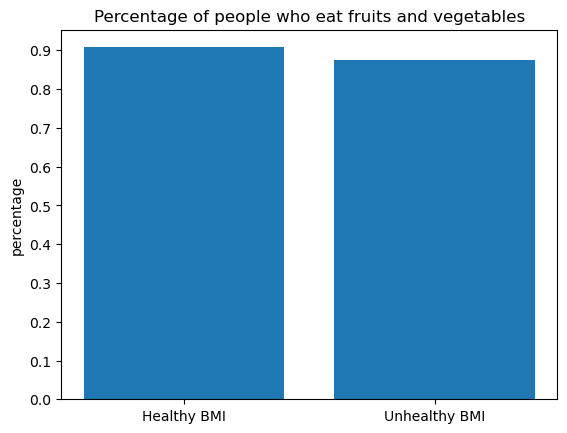

In [59]:
plt.bar(['Healthy BMI','Unhealthy BMI'],[x,y])
plt.yticks(np.arange(0,1,step=0.1))
plt.title('Percentage of people who eat fruits and vegetables')
plt.ylabel('percentage')
plt.show()

It is clear from above observations that almost 90% of both healthy and unhealthy population are taking atleast one of fruits or veggies in their diet.

Therefore we cannot establish a direct relation between intake of fruits and veggies on BMI of individuals.

so we have to check other life style related habits

# ------------------------------------------------------------------------------------------------------------

# Check intake of fruits and veg connection to Diabetes in the total dataset?

In [60]:
#diabetic,pre-diabetic,no-diabetes people count who take atleast one of fruits or veg
df['Diabetes_012'][(df['Fruits']==1)|(df['Veggies']==1)].value_counts()

0.0    189996
2.0     30072
1.0      3959
Name: Diabetes_012, dtype: int64

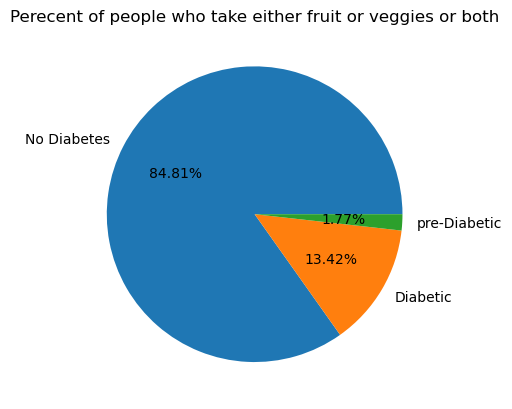

In [61]:
df['Diabetes_012'][(df['Fruits']==1)|(df['Veggies']==1)].value_counts().plot.pie(autopct='%1.2f%%',labels=['No Diabetes','Diabetic','pre-Diabetic'],ylabel='')
plt.title('Perecent of people who take either fruit or veggies or both')
plt.show()


In [62]:
df['Diabetes_012'][(df['Fruits']==0)&(df['Veggies']==0)].value_counts()

0.0    23707
2.0     5274
1.0      672
Name: Diabetes_012, dtype: int64

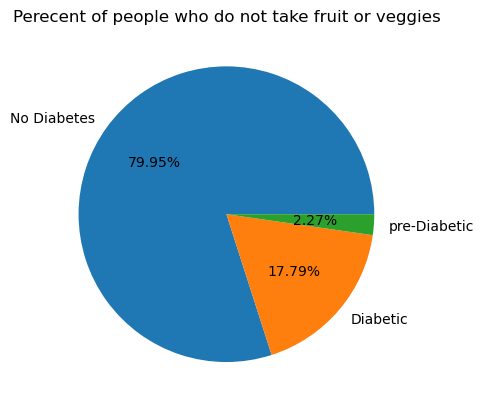

In [63]:
df['Diabetes_012'][(df['Fruits']==0)&(df['Veggies']==0)].value_counts().plot.pie(autopct='%1.2f%%',labels=['No Diabetes','Diabetic','pre-Diabetic'],ylabel='')
plt.title('Perecent of people who do not take fruit or veggies')
plt.show()


## out of people who take either fruits or veggies , only 13.42% are diabetic  whereas out of people who take no fruits or veggies  approx 18% diabetic. This shows intake of good diet may help reduce the risk of diabetes to some extend

# -------------------------------------------------------------------------------------------------------------

# Alcohol consumption and smoking------->BMI  

In [64]:
#BMI CHECK

In [65]:
len(healthy_population[(healthy_population['Smoker']==1)|(healthy_population['HvyAlcoholConsump']==1)])/len(healthy_population)

0.447116151581512

In [66]:
len(unhealthy_population[(unhealthy_population['Smoker']==1)|(unhealthy_population['HvyAlcoholConsump']==1)])/len(unhealthy_population)

0.46870246363552703

#### The percentage of alcoholic and smoker in both healthy and unhealthy BMI individuals roughly around 45 %.This shows no relation of smoking and alcohol on the BMI of person

# ------------------------------------------------------------------------------------------------------------

# Check the relation of smoking and alcohol on diabetes in whole dataset?

In [67]:
df['Diabetes_012'][(df['Smoker']==1)|(df['HvyAlcoholConsump']==1)].value_counts()

0.0    96547
2.0    18530
1.0     2335
Name: Diabetes_012, dtype: int64

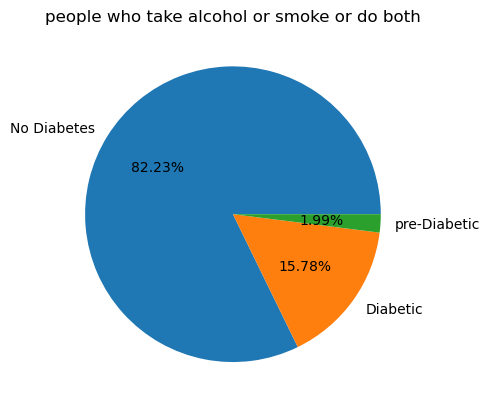

In [68]:
df['Diabetes_012'][(df['Smoker']==1)|(df['HvyAlcoholConsump']==1)].value_counts().plot.pie(autopct='%1.2f%%',labels=['No Diabetes','Diabetic','pre-Diabetic'],ylabel='')
plt.title('people who take alcohol or smoke or do both')
plt.show()

In [69]:
15.78+1.99

17.77

In [70]:
df['Diabetes_012'][(df['Smoker']==0)&(df['HvyAlcoholConsump']==0)].value_counts()

0.0    117156
2.0     16816
1.0      2296
Name: Diabetes_012, dtype: int64

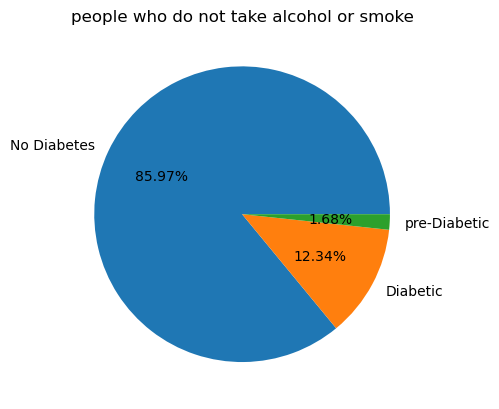

In [71]:
df['Diabetes_012'][(df['Smoker']==0)&(df['HvyAlcoholConsump']==0)].value_counts().plot.pie(autopct='%1.2f%%',labels=['No Diabetes','Diabetic','pre-Diabetic'],ylabel='')
plt.title('people who do not take alcohol or smoke')
plt.show()

In [72]:
12.34+1.68

14.02

#### conclusion: smoking and alcohol intake  affects the chance of being diabetic.considering the pre-diabetic and diabetic conditions as a whole,  roughly 17.77% of people who do either smoking or alcohol have chance of dibetes conditions, whereas only 14%of  non smokers and non alcoholics have  chance of diabetic conditions

# -------------------------------------------------------------------------------------------------------------

# Other diseases connection to diabetes

# BLOOD PRESSURE--------->Diabetes

In [73]:
df['HighBP'][df['Diabetes_012']==2].value_counts()

1.0    26604
0.0     8742
Name: HighBP, dtype: int64

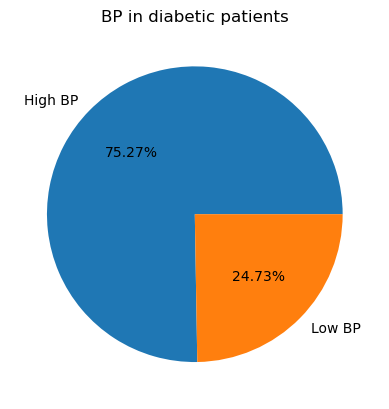

In [74]:
df['HighBP'][df['Diabetes_012']==2].value_counts().plot.pie(autopct='%1.2f%%',labels=['High BP','Low BP'],ylabel='')
plt.title('BP in diabetic patients')
plt.show()

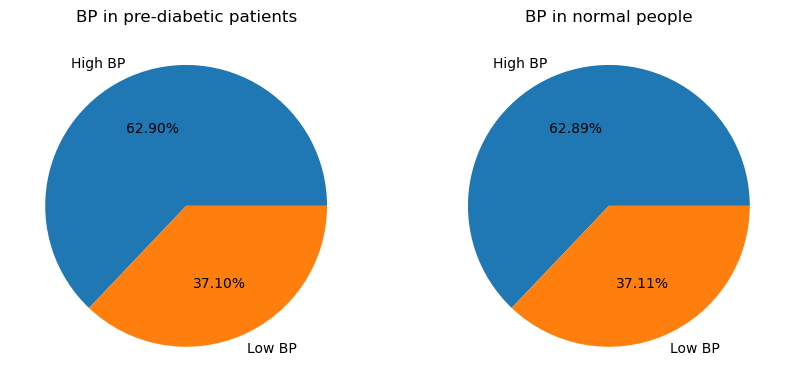

In [75]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
df['HighBP'][df['Diabetes_012']==1].value_counts().plot.pie(autopct='%1.2f%%',labels=['High BP','Low BP'],ylabel='')
plt.title('BP in pre-diabetic patients')

plt.subplot(1,2,2)
df['HighBP'][df['Diabetes_012']==0].value_counts().plot.pie(autopct='%1.2f%%',labels=['High BP','Low BP'],ylabel='')
plt.title('BP in normal people')


plt.show()

# imp conclusion: it is seen that around 75% of  diabetic patients have high BP, it is only around 63% for other cases

# ------------------------------------------------------------------------------------------------------------

# CHOLESTROL---------------->Diabetes

In [76]:
df['HighChol'][~(df['Diabetes_012']==0)].value_counts() #diabetic and prediabetic combined

1.0    26561
0.0    13416
Name: HighChol, dtype: int64

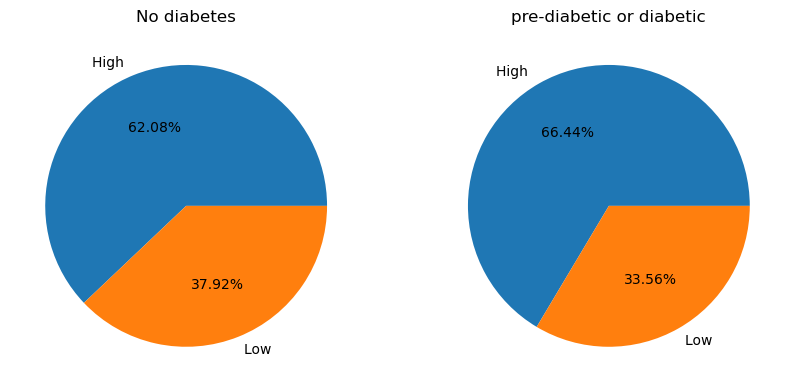

In [77]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
df['HighChol'][df['Diabetes_012']==0].value_counts().plot.pie(autopct='%1.2f%%',labels=['High ','Low '],ylabel='')
plt.title('No diabetes')

plt.subplot(1,2,2)
df['HighChol'][~(df['Diabetes_012']==0)].value_counts().plot.pie(autopct='%1.2f%%',labels=['High ','Low '],ylabel='')
plt.title('pre-diabetic or diabetic')
plt.show()


### conclusion: no big effect of high cholestrol values on diabetes. still diabetic people have slightly higher cholestrol

# -------------------------------------------------------------------------------------------------

# Heart disease,stroke,mental health

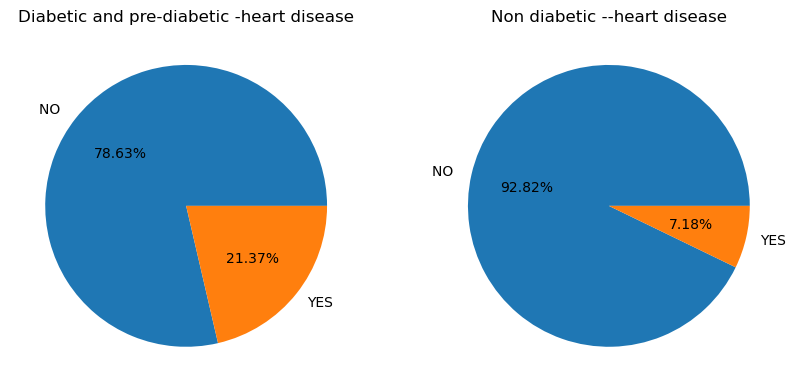

In [78]:
plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
df['HeartDiseaseorAttack'][~(df['Diabetes_012']==0)].value_counts().plot.pie(autopct='%1.2f%%',labels=['NO ','YES'],ylabel='')
plt.title('Diabetic and pre-diabetic -heart disease')

plt.subplot(1,2,2)
df['HeartDiseaseorAttack'][df['Diabetes_012']==0].value_counts().plot.pie(autopct='%1.2f%%',labels=['NO ','YES'],ylabel='')
plt.title('Non diabetic --heart disease')

plt.show()

### conclusion: diabetic and pre-diabetic people are more affected by heart diseases almost 21.37%. only 7% of Non diabetic people have heart diseases.

# ------------------------------------------------------------------------------------------------------------

# Stroke

In [79]:
df['Stroke'][~(df['Diabetes_012']==0)].value_counts()

0.0    36444
1.0     3533
Name: Stroke, dtype: int64

In [80]:
df['Stroke'][df['Diabetes_012']==0].value_counts()

0.0    206944
1.0      6759
Name: Stroke, dtype: int64

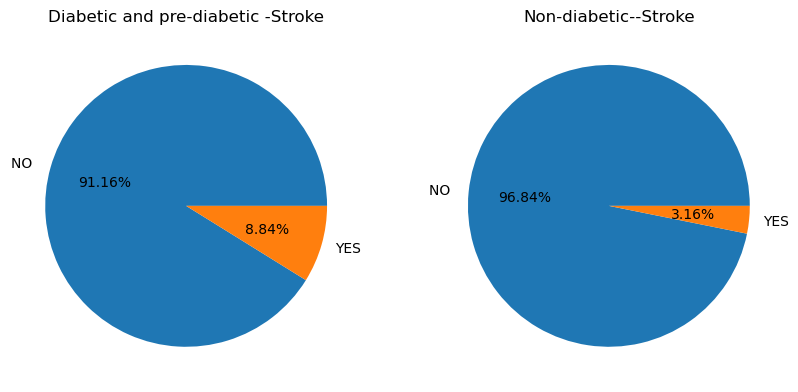

In [81]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
df['Stroke'][~(df['Diabetes_012']==0)].value_counts().plot.pie(autopct='%1.2f%%',labels=['NO ','YES'],ylabel='')
plt.title('Diabetic and pre-diabetic -Stroke')

plt.subplot(1,2,2)
df['Stroke'][df['Diabetes_012']==0].value_counts().plot.pie(autopct='%1.2f%%',labels=['NO ','YES'],ylabel='')
plt.title('Non-diabetic--Stroke')
plt.show()

### conclusion : The percent of people who can have stroke is more in diabetic people almost 8.84%

# -----------------------------------------------------------------------------------------------------

# Mental health and Diabetes (Percentage analysis)---since total data for both diabetes and non diabetes different

In [82]:
ment_nodiab=df['MentHlth'][df["Diabetes_012"]==0].value_counts()

In [83]:
percent_ment_nodiab=ment_nodiab/ment_nodiab.values.sum()

In [84]:
ment_diab=df['MentHlth'][~(df["Diabetes_012"]==0)].value_counts()


In [85]:
percent_ment_diab=ment_diab/ment_diab.values.sum()

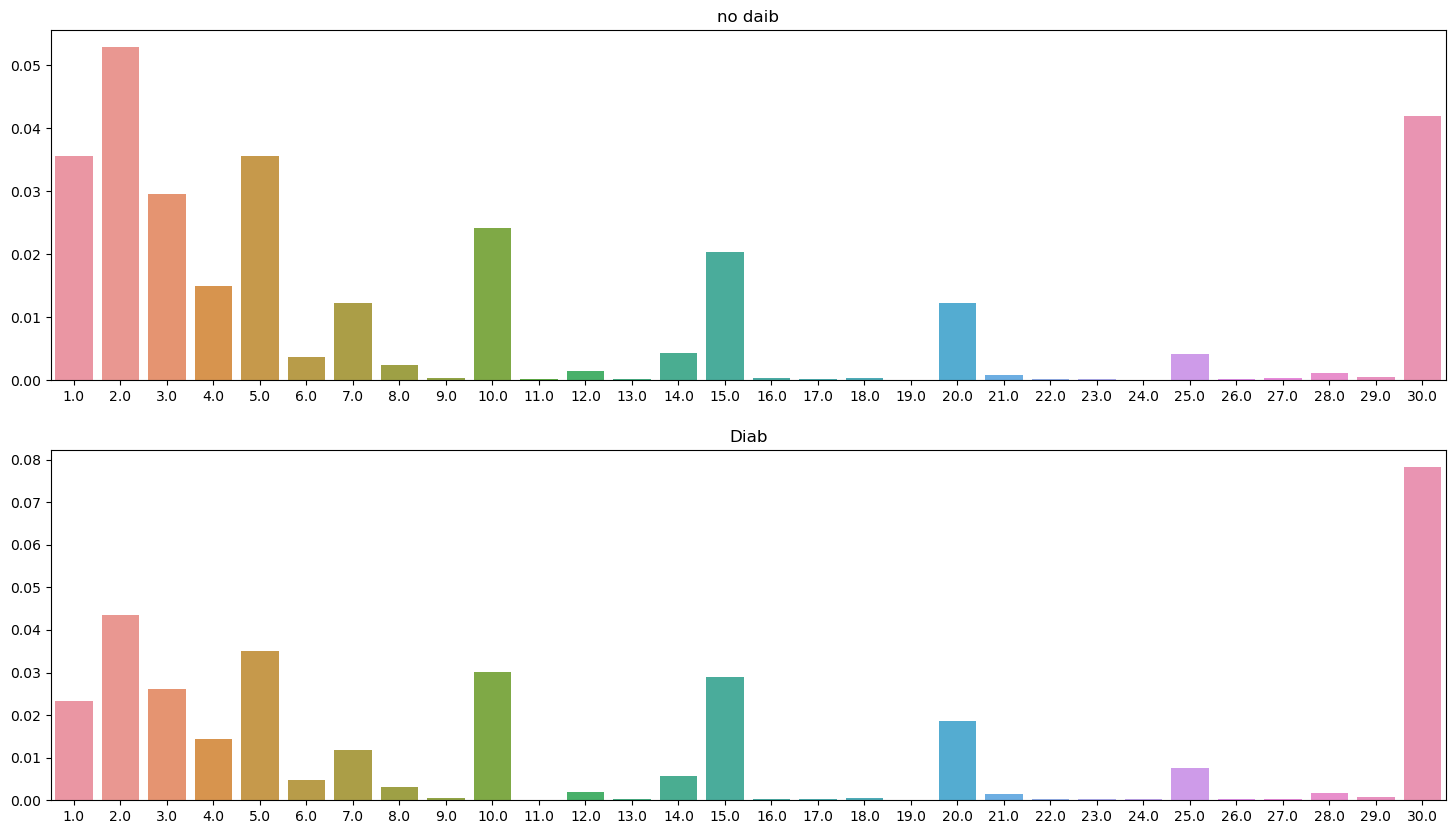

In [86]:
plt.figure(figsize=(18,10))
plt.subplot(2,1,1)
plt.title('no daib')
sns.barplot(x=percent_ment_nodiab[2:].index,y=percent_ment_nodiab[2:].values,alpha=1)

plt.subplot(2,1,2)

plt.title('Diab')

sns.barplot(x=percent_ment_diab[30:].index,y=percent_ment_diab[30:].values,alpha=1)
plt.show()

#### inference: considering the percentages, almost 67% of both diabetic and non diabetic people reported zero mental issues. considering the rest who faced issues, almost 7.5% of Diabetic people reported 30 days of mental disorders which is highest in the group. 5% of  Non diabetic people reported 2 days of mental illness which is highest in the group. 

###  Also we can see from both graphs that for both diabetic and non diabetic ,the count of people reporting mental  issues is more for  frequency of 15 days or less(beginning part of the graph)

# -------------------------------------------------------------------------------------------------------------

# AnyHealthcare,Have any kind of health care coverage, including health insurance, prepaid plans such as HMO?


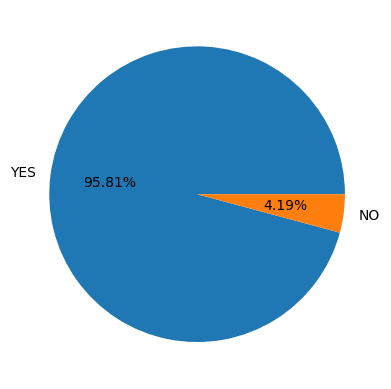

In [87]:
df['AnyHealthcare'][~(df['Diabetes_012']==0)].value_counts().plot.pie(autopct='%1.2f%%',labels=['YES','NO'],ylabel='')
plt.show()

### conclusion:95.81% of the diabetes and pre-diabetic individuals have health care coverage

# -----------------------------------------------------------------------------------------------------------

## Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 


In [88]:
df['NoDocbcCost'][~(df['Diabetes_012']==0)].value_counts()

0.0    35636
1.0     4341
Name: NoDocbcCost, dtype: int64

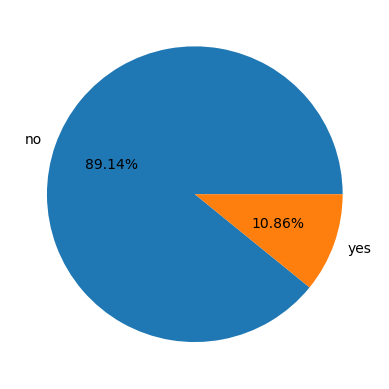

In [89]:
df['NoDocbcCost'][~(df['Diabetes_012']==0)].value_counts().plot.pie(autopct='%1.2f%%',labels=['no','yes'],ylabel='')
plt.show()

#####  Almost 10.86 % of diabetic,pre-diabetic people reported that they could not afford to see a doctor in the past 12 months even when they needed

## Let's investigate if this is due to low income for these people?

In [90]:
#Annual household income ($)


incomeslab=pd.DataFrame({'income_slab':['<10,000','10,000–15,000','15,000–20,000','20,000–25,000','25,000–35,000','35,000–50,000','50,000–75,000','>75,000'],
                         'labels':[1,2,3,4,5,6,7,8]})
incomeslab

,income_slab,labels
0,"<10,000",1
1,"10,000–15,000",2
2,"15,000–20,000",3
3,"20,000–25,000",4
4,"25,000–35,000",5
5,"35,000–50,000",6
6,"50,000–75,000",7
7,">75,000",8


In [91]:
nocash_diab=df['Income'][(df['NoDocbcCost']==1)&(~(df['Diabetes_012']==0))].value_counts()
nocash_diab

3.0    697
4.0    664
2.0    633
5.0    624
1.0    570
6.0    507
7.0    374
8.0    272
Name: Income, dtype: int64

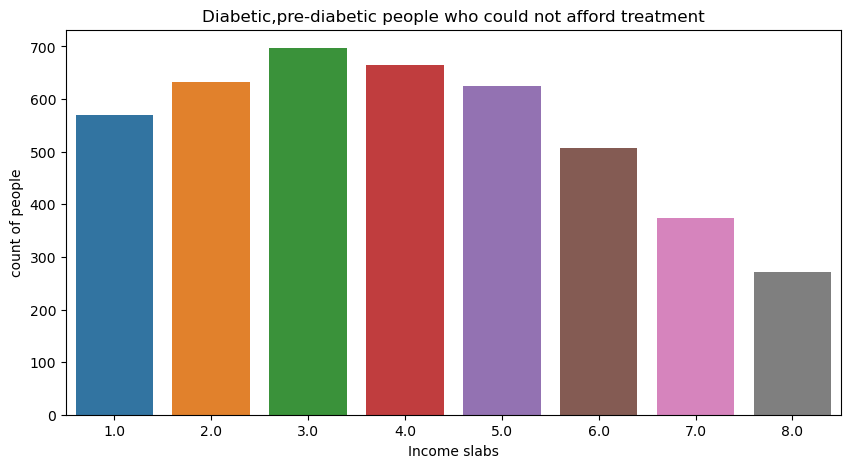

In [92]:
plt.figure(figsize=(10,5))
sns.barplot(x=nocash_diab.index,y=nocash_diab.values)
plt.ylabel('count of people')
plt.xlabel('Income slabs')
plt.title('Diabetic,pre-diabetic people who could not afford treatment')
plt.show()

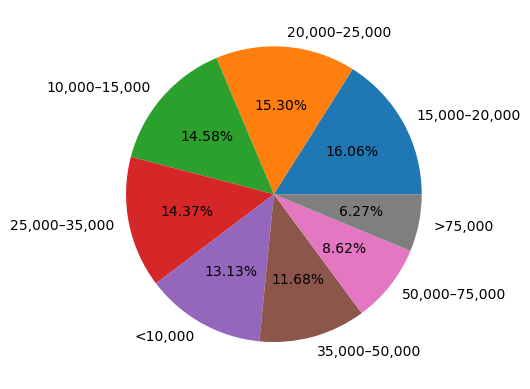

In [93]:
nocash_diab.plot.pie(autopct='%1.2f%%',ylabel='',labels=['15,000–20,000','20,000–25,000','10,000–15,000','25,000–35,000','<10,000','35,000–50,000','50,000–75,000','>75,000'])
plt.show()

In [94]:
100-26.569

73.431

### conclusion:  it is seen that roughly 73.4% of the diabetic  people who were not able to afford the checkup were belonging to low income category . ie: below 35,000 U.S.D.  Also we can infer from the bar plot that middle class is affected more . 

# -------------------------------------------------------------------------------------------------------------

# Awareness of ones own health?  Gen health----BMI and Diabetes

### diabetic people and general health awareness

In [95]:
df['GenHlth'][~(df['Diabetes_012']==0)].value_counts()

3.0    15185
4.0    10815
2.0     7595
5.0     4929
1.0     1453
Name: GenHlth, dtype: int64

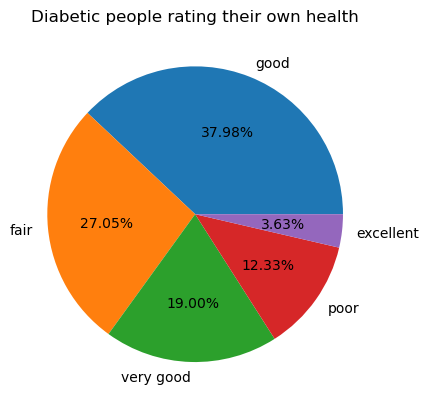

In [96]:
plt.title('Diabetic people rating their own health')

df['GenHlth'][~(df['Diabetes_012']==0)].value_counts().plot.pie(autopct='%1.2f%%',labels=['good','fair','very good','poor','excellent' ],ylabel='')
plt.show()

In [97]:
37.98+19+3.63

60.61

### Inference: A total of 60% of the diabetic people have rated their health to be excellent or good which shows a lack of awareness of their own health. 

In [98]:
df['GenHlth'][df['Diabetes_012']==0].value_counts()

2.0    81489
3.0    60461
1.0    43846
4.0    20755
5.0     7152
Name: GenHlth, dtype: int64

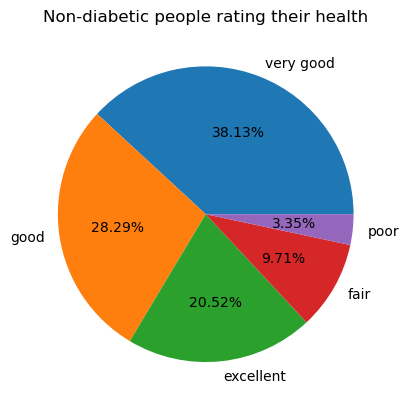

In [99]:
plt.title('Non-diabetic people rating their health')

df['GenHlth'][df['Diabetes_012']==0].value_counts().plot.pie(autopct='%1.2f%%',labels=['very good','good','excellent','fair','poor' ],ylabel='')
plt.show()

### inference: Non -diabetic people seem to be more aware of their health conditions and majority has reported excellent and good health conditions

## imp conclusion: A lack of awareness about ones state of health is clearly seen in case of diabetic people.

# -------------------------------------------------------------------------------------------------------------

## Unhealthy BMI and general health awareness

### inference: Healthy BMI population show a good awareness of their general health state.

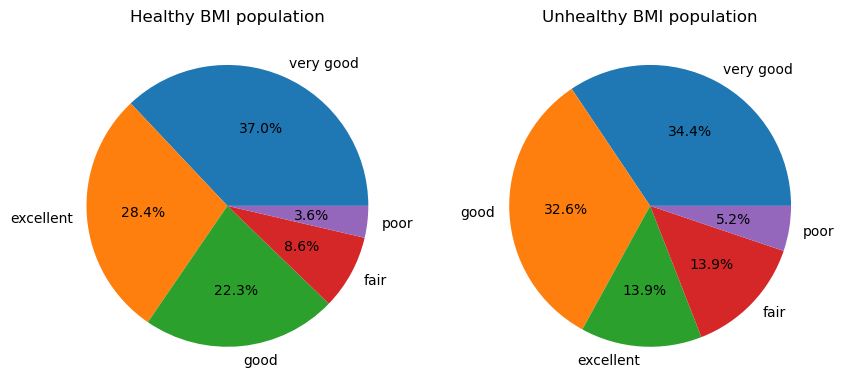

In [100]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title('Healthy BMI population')
healthy_population['GenHlth'].value_counts().plot.pie(autopct='%1.1f%%',labels=['very good','excellent','good','fair','poor'],ylabel='')

plt.subplot(1,2,2)
plt.title('Unhealthy BMI population')
unhealthy_population['GenHlth'].value_counts().plot.pie(autopct='%1.1f%%',labels=['very good','good','excellent','fair','poor'],ylabel='')
plt.show()

In [101]:
34.4+13.9+32.6

80.9

## imp conclusion: about 80% of the unhealthy BMI population has rated their general health in the excellent to good category. This shows a very poor awareness among people about their health

# -------------------------------------------------------------------------------------------------------------- 

# Extra analysis between features

# Education and Income

In [102]:
data=df[['Education','Income']]

In [103]:
data

,Education,Income
0,4.0,3.0
1,6.0,1.0
2,4.0,8.0
3,3.0,6.0
4,5.0,4.0
...,...,...
253675,6.0,7.0
253676,2.0,4.0
253677,5.0,2.0
253678,5.0,1.0


### violin plot--- between categorical features

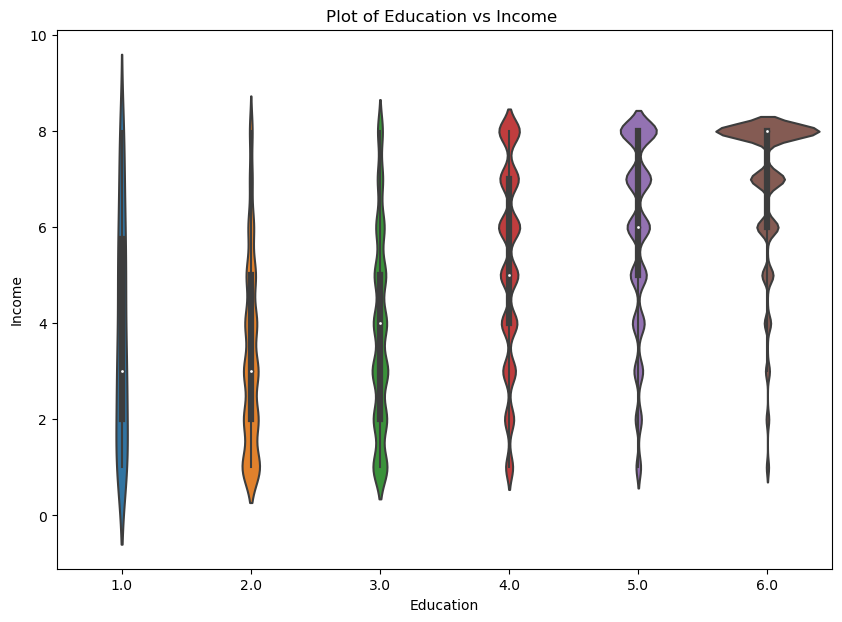

In [104]:
plt.figure(figsize=(10,7))
plt.title('Plot of Education vs Income ')

sns.violinplot(data=data,x='Education',y='Income')
plt.show()

### conclusion: This violin plot  shows that people with low education earns less, people who have a moderate education has earnings in all the income slabs. But it is evident from violin plot that the count of well educated people are more in the high income category. Clearly shows that educated people earn far better than others.

# ------------------------------------------------------------------------------------------------------------

# Education and cholestrol checking

we would like to check how education has influenced the awareness of people and how much they are concerned about health

Education
 scale 1-6 
 
1 = Never attended school or only kindergarten

2 = Grades 1 through 8 (Elementary) 

3 = Grades 9 through 11 (Some high school) 

4 = Grade 12 or GED (High school graduate)

5 = College 1 year to 3 years (Some college or technical school)

6 = College 4 years or more (College graduate)


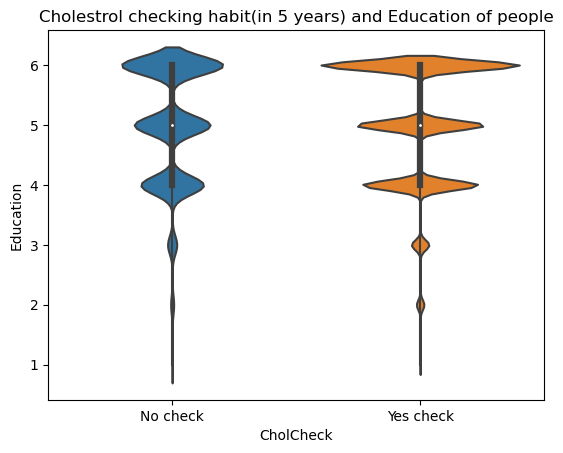

In [105]:
plt.title('Cholestrol checking habit(in 5 years) and Education of people')
sns.violinplot(data=df,x='CholCheck',y='Education')
plt.xticks([0,1],['No check','Yes check'])
plt.show()

## It is  evident from violin plot that for people who have education less than class 3(that is below high school) are poorly concerned about checking the cholestrol levels.

In [106]:
df['CholCheck'][df['Education']<=3].value_counts()/len(df)

1.0    0.052160
0.0    0.001825
Name: CholCheck, dtype: float64

It is evident from the percentage also. for people with lower education than high school ,only 5% of people in the whole data check cholestrol . 

In [107]:
df['CholCheck'][df['Education']>3].value_counts()/len(df)

1.0    0.910509
0.0    0.035505
Name: CholCheck, dtype: float64

In the case of higher education people the percentage of individuals that check cholestrol levels is as high as 91%

### This shows a direct relationship between ones education and awareness of physical health

# --------------------------------------------------------------------------------------------------------------

In [108]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

# APPLY MACHINE LEARNING ALGORITHMS--CLASSIFICATION

In [109]:
# importing all the necessary libraries from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier


In [110]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [111]:
x=df.iloc[:,1:-2].values    # dropped education and income as it has no direct relation to a patient being diabetic
y=df.iloc[:,0].values

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=0)

# LOGISTIC REGRESSION

In [113]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
lr_accuracy=accuracy_score(y_test,lr_pred)
lr_cm=confusion_matrix(y_test,lr_pred)


C:\Users\akhbh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [114]:
lr_accuracy

0.8436297697887102

In [115]:
lr_cm

array([[52148,     0,  1137],
       [ 1057,     0,    76],
       [ 7647,     0,  1355]], dtype=int64)

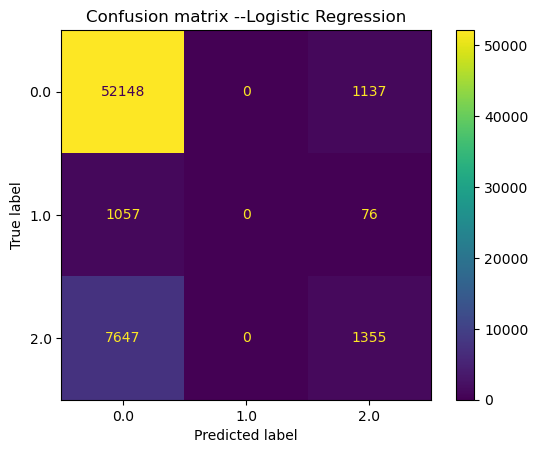

In [116]:

lr_disp=ConfusionMatrixDisplay(confusion_matrix=lr_cm,display_labels=lr.classes_)
lr_disp.plot()
plt.title('Confusion matrix --Logistic Regression')
plt.show()

In [117]:
#########################################################################################

# DECISION TREE CLASSIFIER

In [118]:
dt=DecisionTreeClassifier(criterion='gini',random_state=0)
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
dt_accuracy=accuracy_score(y_test,dt_pred)
dt_cm=confusion_matrix(y_test,dt_pred)


In [119]:
dt_accuracy

0.7794228949858089

In [120]:
dt_cm

array([[46642,   957,  5686],
       [  832,    33,   268],
       [ 5916,   330,  2756]], dtype=int64)

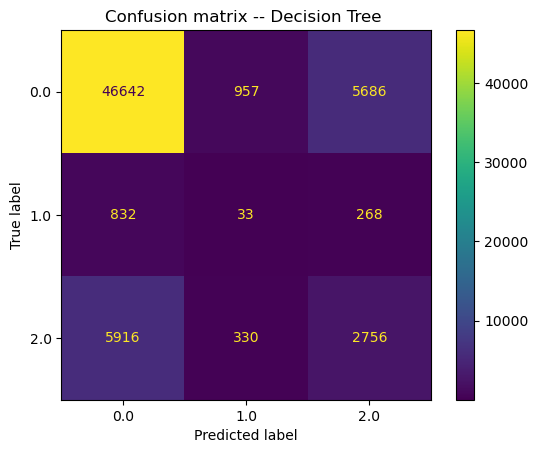

In [121]:
dt_disp=ConfusionMatrixDisplay(confusion_matrix=dt_cm,display_labels=dt.classes_)
dt_disp.plot()
plt.title('Confusion matrix -- Decision Tree ')
plt.show()

In [122]:
#############################################################################################################

# RANDOM FOREST CLASSIFIER

In [123]:
rf=RandomForestClassifier(n_estimators=100,criterion='gini',random_state=0)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
rf_accuracy=accuracy_score(y_test,rf_pred)
rf_cm=confusion_matrix(y_test,rf_pred)




In [124]:
rf_accuracy

0.8350678019552191

In [125]:
rf_cm

array([[50940,   100,  2245],
       [  984,     7,   142],
       [ 6960,    29,  2013]], dtype=int64)

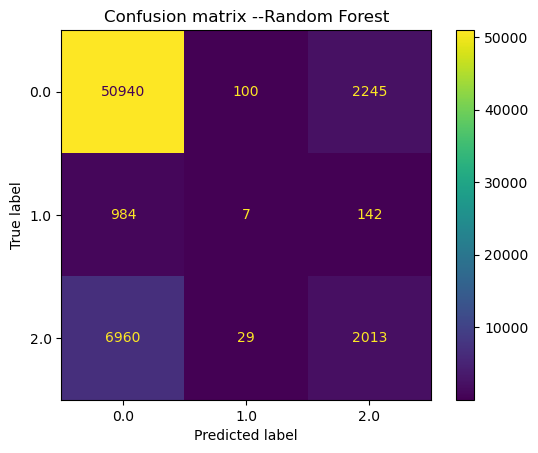

In [126]:
rf_disp=ConfusionMatrixDisplay(confusion_matrix=rf_cm,display_labels=rf.classes_)
rf_disp.plot()
plt.title('Confusion matrix --Random Forest')
plt.show()

In [127]:
#####################################################################################################

# NAIVE BAYES-- GAUSSIAN NB

In [128]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb_pred=gnb.predict(x_test)
gnb_accuracy=accuracy_score(y_test,gnb_pred)
gnb_cm=confusion_matrix(y_test,gnb_pred)



In [129]:
gnb_accuracy

0.7614474929044466

In [130]:
gnb_cm

array([[43241,   427,  9617],
       [  636,    16,   481],
       [ 3869,    99,  5034]], dtype=int64)

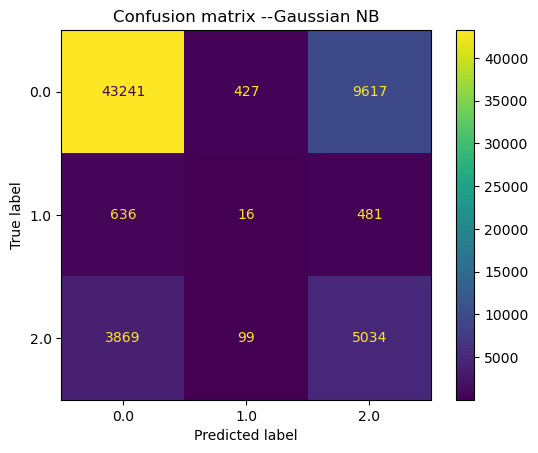

In [131]:
gnb_disp=ConfusionMatrixDisplay(confusion_matrix=gnb_cm,display_labels=gnb.classes_)
gnb_disp.plot()
plt.title('Confusion matrix --Gaussian NB')
plt.show()

In [132]:
##########################################################################################################

# NAIVE BAYES---BERNOULLI NB

In [133]:
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
bnb_pred=bnb.predict(x_test)
bnb_accuracy=accuracy_score(y_test,bnb_pred)
bnb_cm=confusion_matrix(y_test,bnb_pred)


In [134]:
bnb_accuracy

0.8197729422894986

In [135]:
bnb_cm

array([[48873,     0,  4412],
       [  883,     0,   250],
       [ 5885,     0,  3117]], dtype=int64)

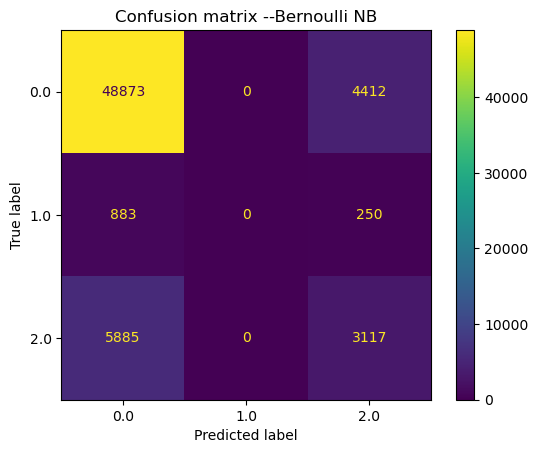

In [136]:
bnb_disp=ConfusionMatrixDisplay(confusion_matrix=bnb_cm,display_labels=bnb.classes_)
bnb_disp.plot()
plt.title('Confusion matrix --Bernoulli NB')
plt.show()

In [137]:
############################################################################################################################

# LINEAR-SVM

In [138]:
lsvm=LinearSVC()

In [139]:
lsvm.fit(x_train,y_train)

C:\Users\akhbh\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [140]:
lsvm_pred=lsvm.predict(x_test)

In [141]:
lsvm_accuracy=accuracy_score(y_test,lsvm_pred)
lsvm_accuracy

0.8396404919583728

In [142]:
lsvm_cm=confusion_matrix(y_test,lsvm_pred)
lsvm_cm

array([[50511,     0,  2774],
       [  940,     0,   193],
       [ 6263,     0,  2739]], dtype=int64)

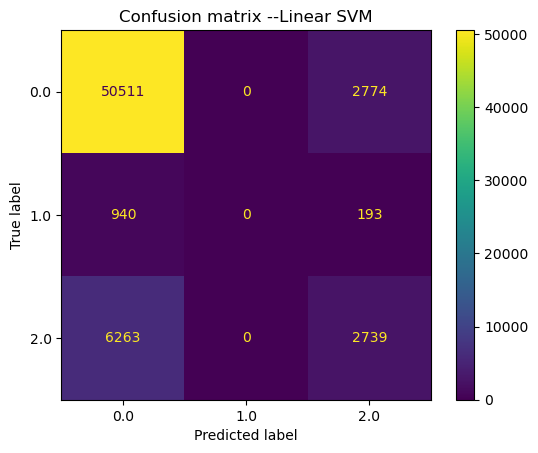

In [143]:
lsvm_disp=ConfusionMatrixDisplay(confusion_matrix=lsvm_cm,display_labels=lsvm.classes_)
lsvm_disp.plot()
plt.title('Confusion matrix --Linear SVM')
plt.show()

In [144]:
###################################################################################################################

In [150]:
modelacc={'Logistic Regression':lr_accuracy,'Decision Tree':dt_accuracy,'Random Forest':rf_accuracy,'Gaussian NB':gnb_accuracy,
         'Bernoulli NB':bnb_accuracy,'Linear SVM':lsvm_accuracy}

In [151]:
for k,v in modelacc.items():
    print(f'The model {k} :  gives an accuracy = {v}')

The model Logistic Regression :  gives an accuracy = 0.8436297697887102
The model Decision Tree :  gives an accuracy = 0.7794228949858089
The model Random Forest :  gives an accuracy = 0.8350678019552191
The model Gaussian NB :  gives an accuracy = 0.7614474929044466
The model Bernoulli NB :  gives an accuracy = 0.8197729422894986
The model Linear SVM :  gives an accuracy = 0.8396404919583728


### ACCURACY OF MODELS

The model Logistic Regression :  gives an accuracy = 0.8436297697887102

The model Decision Tree :  gives an accuracy = 0.7794228949858089

The model Random Forest :  gives an accuracy = 0.8350678019552191

The model Gaussian NB :  gives an accuracy = 0.7614474929044466

The model Bernoulli NB :  gives an accuracy = 0.8197729422894986

The model Linear SVM :  gives an accuracy = 0.7707505518763796

### Conclusion: Logistic regression gives the most accuracy of 84.36% 

# -----------------------------------------------------------------------------------------------------------

# Dropping pre-diabetic column

To check if the accuracy is very much affected due to presence of pre-diabetic category which is only 1.83% of whole data

In [152]:
df1=df[~(df['Diabetes_012']==1)]
df1

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [153]:
df1['Diabetes_012'].value_counts()

0.0    213703
2.0     35346
Name: Diabetes_012, dtype: int64

In [154]:
x1=df1.iloc[:,1:-2].values    # dropped education and income
y1=df1.iloc[:,0].values

In [155]:
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,train_size=0.75,random_state=0)

#### LOGISTIC REGRESSION

In [156]:
lr1=LogisticRegression()
lr1.fit(xtrain,ytrain)
lr1_pred=lr1.predict(xtest)
lr1_accuracy=accuracy_score(ytest,lr1_pred)
lr1_cm=confusion_matrix(ytest,lr1_pred)


C:\Users\akhbh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [157]:
lr1_accuracy

0.861362285787707

In [158]:
lr1_cm

array([[52294,  1164],
       [ 7468,  1337]], dtype=int64)

#### RANDOM FOREST

In [159]:
rf1=RandomForestClassifier(n_estimators=100,criterion='gini',random_state=0)
rf1.fit(xtrain,ytrain)
rf1_pred=rf1.predict(xtest)
rf1_accuracy=accuracy_score(ytest,rf1_pred)
rf1_cm=confusion_matrix(ytest,rf1_pred)




In [160]:
rf1_accuracy

0.8517578658272168

In [161]:
rf1_cm

array([[51124,  2334],
       [ 6896,  1909]], dtype=int64)

#### DECISION TREE

In [162]:
dt1=DecisionTreeClassifier(criterion='gini',random_state=0)
dt1.fit(xtrain,ytrain)
dt1_pred=dt1.predict(xtest)
dt1_accuracy=accuracy_score(ytest,dt1_pred)
dt1_cm=confusion_matrix(ytest,dt1_pred)




In [163]:
dt1_accuracy

0.8097746655316962

In [164]:
dt1_cm

array([[47608,  5850],
       [ 5994,  2811]], dtype=int64)

#### NAIVE BAYES-GAUSSIAN NB

In [165]:
gnb1=GaussianNB()
gnb1.fit(xtrain,ytrain)
gnb1_pred=gnb1.predict(xtest)
gnb1_accuracy=accuracy_score(ytest,gnb1_pred)
gnb1_cm=confusion_matrix(ytest,gnb1_pred)


In [166]:
gnb1_accuracy

0.775099176075679

In [167]:
gnb1_cm

array([[43337, 10121],
       [ 3882,  4923]], dtype=int64)

#### NAIVE BAYES - BERNOULLI NB

In [168]:
bnb1=BernoulliNB()
bnb1.fit(xtrain,ytrain)
bnb1_pred=bnb1.predict(xtest)
bnb1_accuracy=accuracy_score(ytest,bnb1_pred)
bnb1_cm=confusion_matrix(ytest,bnb1_pred)

In [169]:
bnb1_accuracy

0.8315050672148788

In [170]:
bnb1_cm

array([[48799,  4659],
       [ 5832,  2973]], dtype=int64)

#### LINEAR SVM

In [171]:
lsvm1=LinearSVC()

lsvm1.fit(xtrain,ytrain)
lsvm1_pred=lsvm1.predict(xtest)
lsvm1_accuracy=accuracy_score(ytest,lsvm1_pred)
lsvm1_cm=confusion_matrix(ytest,lsvm1_pred)

C:\Users\akhbh\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [172]:
lsvm1_accuracy

0.8402743202222829

In [173]:
lsvm1_cm

array([[51050,  2408],
       [ 7537,  1268]], dtype=int64)

In [174]:
modelacc1={'Logistic Regression':lr1_accuracy,'Decision Tree':dt1_accuracy,'Random Forest':rf1_accuracy,'Gaussian NB':gnb1_accuracy,
         'Bernoulli NB':bnb1_accuracy,'Linear SVM':lsvm1_accuracy}

In [175]:
for k,v in modelacc1.items():
    print(f'The model {k} :  gives an accuracy = {v}')

The model Logistic Regression :  gives an accuracy = 0.861362285787707
The model Decision Tree :  gives an accuracy = 0.8097746655316962
The model Random Forest :  gives an accuracy = 0.8517578658272168
The model Gaussian NB :  gives an accuracy = 0.775099176075679
The model Bernoulli NB :  gives an accuracy = 0.8315050672148788
The model Linear SVM :  gives an accuracy = 0.8402743202222829


The model Logistic Regression :  gives an accuracy = 0.861362285787707

The model Decision Tree :  gives an accuracy = 0.8097746655316962

The model Random Forest :  gives an accuracy = 0.8517578658272168

The model Gaussian NB :  gives an accuracy = 0.775099176075679

The model Bernoulli NB :  gives an accuracy = 0.8315050672148788

The model Linear SVM :  gives an accuracy = 0.7794356198705491

## Conclusion: Removing the pre-diabetic class which is only 1.83% of the dataset slightly increased the accuracy of all the models. The highest accuracy is still given by Logistic regression 86.13%.

# -------------------------------------------------------------------------------------------------------------

# OBSERVATIONS:

### With respect to total data ,the number of non diabetic people are more 85%, Diabetic patients around 14%, pre-diabetic patients around 1.8% 

### The percentage of males in the dataset is 44% and females is 55.9% .

###  Almost 13% of the females in the data are diabetic and 15% of the males are diabetic

### The count of overweight and obese population is very high as compared to the number of healthy individuals

overweight population=36.96%

obese population=34.63%

underweight population=1.23%

Healthy population is only about 27.18%

### Even though the count of unhealthy females is more than males, if we consider the percentage of unhealthy males and unhealthy females it is clear that Male are more unhealthy in terms of BMI than females

### The percentage of pre-diabetic males and females are almost equal and very low around 1.8% of respective male and female population

### Almost 90% of both healthy and unhealthy population are taking atleast one of fruits or veggies in their diet.



### The percentage of alcoholic and smoker in both healthy and unhealthy BMI individuals roughly around 45 %.This shows no relation of smoking and alcohol on the BMI of person

### Almost 67% of both diabetic and non diabetic people reported zero mental issues. considering the rest who faced issues, almost 7.5% of Diabetic people reported 30 days of mental disorders which is highest in the group. 5% of Non diabetic people reported 2 days of mental illness which is highest in the group. For  both diabetic and non diabetic ,the count of people reporting mental issues is more for frequency of 15 days or less(beginning part of the graph)

### A total of 60% of the diabetic people have rated their health to be excellent or good which shows a lack of awareness of their own health

### Non -diabetic people seem to be more aware of their health conditions and majority has reported excellent and good health conditions

# CONCLUSIONS:

### 78% of males and 68%females are unhealthy (BMI),if we consider the percentage of unhealthy males and unhealthy females it is clear that Male are more unhealthy in terms of BMI than females

### Only 5.7% of the healthy BMI individuals affected by diabetes,whereas 17.01% of unhealthy BMI individuals are affected by diabetes.This shows that overweight,underweight,obese conditions increases the risk of diabetes

### 82% of healthy BMI individuals do exercise regularly, it is only 73% in case of unhealthy BMI individuals. This shows healthy people do exercise very often

### Out of people who take either fruits or veggies , only 13.42% are diabetic whereas out of people who take no fruits or veggies approx 18% diabetic. This shows intake of good diet may help reduce the risk of diabetes to some extend

### Smoking and alcohol intake slightly affects the chance of being diabetic.considering the pre-diabetic and diabetic conditions as a whole, roughly 17.77% of people who do either smoking or alcohol have chance of dibetes conditions, whereas only 14%of non smokers and non alcoholics have chance of diabetic conditions

### Around 75% of diabetic patients have high BP, it is only around 63% for other cases

### No big effect of high cholestrol values on diabetes. still diabetic people have slightly higher cholestrol

### Diabetic and pre-diabetic people are more affected by heart diseases almost 21.37%. Only 7% of Non diabetic people have heart diseases.¶

### The percent of people who can have stroke is more in diabetic people almost 8.84%

### 95.81% of the diabetes and pre-diabetic individuals have health care coverage

### Almost 10.86 % of diabetic,pre-diabetic people reported that they could not afford to see a doctor in the past 12 months even when they needed

### Roughly 73.4% of the diabetic people who were not able to afford the checkup were belonging to low income category , ie: below 35,000 U.S.D. Also we can infer that middle class is affected more .


### A lack of awareness about ones state of health is clearly seen in case of diabetic people.

### About 80% of the unhealthy BMI population has rated their general health in the excellent to good category. This shows a very poor awareness among people about their health

### The violin plot clearly shows that people with low education earns less, people who have a moderate education has earnings in all the income slabs. But the count of well educated people are more in the high income category. Educated people earn far better than others.

### People who have education less than class 3(that is below high school) are poorly concerned about checking the cholestrol levels

# -------------------------------------------------------------------------------------------------------

###  Logistic Regression algorithm gives the maximum accuracy of 84.36% for diabetes classification 

The model Logistic Regression : gives an accuracy = 0.8436297697887102

The model Decision Tree : gives an accuracy = 0.7794228949858089

The model Random Forest : gives an accuracy = 0.8350678019552191

The model Gaussian NB : gives an accuracy = 0.7614474929044466

The model Bernoulli NB : gives an accuracy = 0.8197729422894986

The model Linear SVM : gives an accuracy = 0.7707505518763796



###  Removing the pre-diabetic class which is only 1.83% of the whole  dataset slightly increased the accuracy of all the models. The highest accuracy is still given by Logistic regression 86.13%.

# ===========================================================